# IAB303 - Assignment 2
## TOWS analysis report

#### INSTRUCTIONS

1. Complete the section below with your personal details (and run the cell)
2. Choose to use either the supplied scenario OR your own scenario. If selecting your own, check suitability with teaching team. If using the supplied scenario, use the provided internal data. You may supplement this with additional data as required.
3. Ensure that you include at least 1 complete analysis using *internal* data
4. Ensure that you include at least 1 complete analysis using *external* data
5. Ensure that you include at least 1 actionable recommendation from a TOWS analysis using your data analytics from steps 3 & 4.
6. Ensure that you use markdown cells to document your thinking and decision making for each stage of the process. Be clear on how your decisions are working towards addressing the business concern.
7. Your notebook should include enough markdown text so that it reads more like a report. For example, the business stakeholders should be able to ignore the code and read your text and understand what you did and why.
8. Ensure that you undertakee a peer review process and complete the peer review section
9. Before handing in your notebook, clear all cell outputs and run the complete notebook. Ensure that it runs without errors and that all output is displaying
10. Right-click on your notebook name (in file viewer) and select download. Ensure that your name and student ID are on the file, and then upload to the appropriate assignment upload link in blackboard.

In [1]:
# Complete the following cell with your details and run to produce your personalised header for this assignment

from IPython.core.display import display, HTML

first_name = "Quoc Huy"
last_name = "Nguyen"
student_number = "n10289020"

personal_header = "<h1>"+first_name+" "+last_name+" ("+student_number+")</h1>"
display(HTML(personal_header))

---

## SCENARIO

***Use the provided scenario (option 1), OR write a description of your own scenario (option 2):***

---

#### Option 1 - Restarting a failed business

You are working as a business analytics consultant for an entrepreneur who has just bought the online assets of a business that failed last year due to the global pandemic. The entrepreneur would like use any valuable knowledge from the previous business together with current opportunities. You have sales data from 2017-2019 for the failed business that you can use to find any possible strengths and weaknesses, and you can scrape web pages for current opportunities and threats. Usings a TOWS approach, identify actionable recommendations for the entrepreneur.

The sales data can be found here: [Online Business Sales 2017-2019](https://www.kaggle.com/tylermorse/retail-business-sales-20172019)

*Note: For the purposes of this exercise, you can make up other aspects of the scenario which may be important to your anlaysis (e.g. business name, location, example products, entrepreneur focus, etc)*

---

#### Option 2 - Your own scenario

Write your own scenario. It may build on the 'Koala' scenario of Assignment 1 if you like, or it could be something from your workplace, or you may like to *imagine* a scenario. 

It must include the following:
- Clearly described stakeholder/s
- Background giving need for analysis
- At least 1 internal dataset
- At least 1 external source of data
- A need for TOWS analysis
- A need for Actionable recommendations

---


### [1] Business Concern

From 2017 to 2020, an Australia online business **Prish** had been focusing on domestic appliance and cosmetics retail market. Due to COVID-19, the company has failed and been sold to Benjamin Ross - an entrepreneur who is looking to enter the online retail market in Australia. Benjamin is based in Sydney, and his goal is to lauching the business as soon as the COVID lockdown ends. This time is the opportunity or him to gain comprehensive understanding in both previous business and the current market. He has hired us to investigate pros and cons of **Prish**, explore external opportunities and threats, and recommend any changes  and actions needed to be conducted before lauching the business.

In [1]:
# import libraries needed for this notebook here
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import requests
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

### [2] Analysis of External Data - Opportunities and/or Threats

The threats and opportunities analysis is based on the industry sector that Prish had been focusing on. External statistics for home appliances and cosmetics retail market is concerned. Ecommerce market trend is also relevant. Since the client desires to start the business after the COVID-19 lockdown in Sydney ends, data for COVID cases and vaccination will be included. This section uses scrapped data in an attempt to answer following questions:
- Is the concerned market growing recently? What is the potential market size?
- What is the competitiveness of the market?
- What some COVID-related factors that could affect the business lauching timeline?

#### Data

In [3]:
# Online sales data from https://www.abs.gov.au/articles/online-sales-october-2020-supplementary-covid-19-analysis
online_sales_data = pd.read_csv('external_data/online_sales.csv')
online_sales_data.head()

Date Original ($m) Seasonally Adjusted ($m)
0  Oct-14           715                    675.9
1  Nov-14         752.3                    674.3
2  Dec-14         863.2                    687.5
3  Jan-15         665.5                    708.8
4  Feb-15         615.5                    719.1

Australian Bureau of Statistics provides us with the online sales data from 2014 to 2020. We use this dataset to analyze the growth of ecommerce market.

In [4]:
# Aggregate the data into year-wise
online_sales_data['Year'] = online_sales_data['Date'].str[-2:].astype(int) + 2000
sales_year = online_sales_data[['Year', 'Original ($m)', 'Seasonally Adjusted ($m)']]
sales_year['Original ($m)'] = sales_year['Original ($m)'].str.replace(',','').astype(float)
sales_year['Seasonally Adjusted ($m)'] = sales_year['Seasonally Adjusted ($m)'].str.replace(',','').astype(float)
sales_year = sales_year.groupby('Year', as_index=False).sum()
sales_year

Year  Original ($m)  Seasonally Adjusted ($m)
0  2014         2330.5                    2037.7
1  2015         9215.3                    9195.8
2  2016        10822.1                   10739.8
3  2017        13208.0                   13075.8
4  2018        18044.3                   17970.4
5  2019        20803.5                   20753.4
6  2020        25890.2                   26740.2

In [51]:
## Australian competitors
def get_HTML(url):
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()
    return html
url = 'https://ecommerceguide.com/top/top-10-ecommerce-sites-in-australia/'
soup = BeautifulSoup(get_HTML(url), "html.parser")

Ecommerce is not a young market in Australia. There are few giants that captured huge market segments. Below table shows some big organizations that have already acquired huge number of visitors each month. Ebay, Amazon and Gumtree are our direct competitors since the cover all type of products that we have. Woolworthes and Coles are indirect competitors because Prish does not have food product lines. Others do have some intersections with Prish and should also be of concerned.

In [76]:
competitors_data = {
    'Business': [],
    'Monthly visitors (mil)': []
}
h2_list = soup.find_all('h2')
for i in range(1,len(h2_list)):
    competitors_data['Business'].append(h2_list[i].strong.a.get_text())
estimated_visitors = soup.find_all("div", {"class": "post-content entry-content cf"})[0].findAll(text=re.compile('Estimated')) 
for e in estimated_visitors:
    number = float(e.split(": ")[1].split(' ')[0])
    competitors_data['Monthly visitors (mil)'].append(number)
competitors_df = pd.DataFrame(competitors_data)
competitors_df

Business  Monthly visitors (mil)
0     eBay Australia                   68.22
1  Gumtree Australia                   33.57
2   Amazon Australia                   28.80
3         Woolworths                   17.58
4           JB Hi-Fi                   17.18
5    Kmart Australia                   16.90
6              Big W                   12.28
7          Kogan.com                   10.33
8              Coles                   10.12
9  Chemist Warehouse                    8.74

Using the Vaccination Rate data for each Australian state, we can roughly predict the pandemic lockdown. Australian government have stated the vaccination rate threshold for COVID lockdown ease to be 80%. As the client wants to launch the business as soon as the Covid lockdown ends, it crucial to have look into the vaccination rate data for each state and plan out the marketing campaign location and timeframe.

In [83]:
state_vaccine_rate = pd.read_csv('external_data/State Vacine Rate.csv')
state_vaccine_rate

State Vacination Rate
0               New South Wales          43.60%
1                      Victoria          36.10%
2                    Queensland          33.60%
3               South Australia          36.40%
4             Western Australia          33.60%
5                      Tasmania          43.10%
6            Northern Territory          37.30%
7  Australian Capital Territory          45.40%

#### Analysis

In [121]:
sale_growth_rate = pd.DataFrame({
    'Year': [],
    'Original (%)' : [],
    'Seasonally Adjusted (%)': [],
})

sale_growth_rate['Year'] = sales_year['Year']
sale_growth_rate['Original (%)'] = sales_year['Original ($m)'].pct_change() * 100
sale_growth_rate['Seasonally Adjusted (%)'] = sales_year['Seasonally Adjusted ($m)'].pct_change() * 100
sale_growth_rate

Year  Original (%)  Seasonally Adjusted (%)
0  2014           NaN                      NaN
1  2015    295.421583               351.283310
2  2016     17.436220                16.790274
3  2017     22.046553                21.750871
4  2018     36.616445                37.432509
5  2019     15.291255                15.486578
6  2020     24.451174                28.847321

The Australian ecommerce market is growing constantly. It slow down in 2019 but had a potential soar in 2020. In 2015, the market have increased approximately 300%. This is likely to be a mistake when the data was recorded. The data for **2014** seems to be only for the last quarter in of the year.

In [123]:
## State that are likely to oopen soon
state_vaccine_rate = state_vaccine_rate.sort_values('Vacination Rate', ascending=False)
state_vaccine_rate['Vacination Rate'] = state_vaccine_rate['Vacination Rate'].astype(str).str[:5].astype(float)
state_vaccine_rate

State  Vacination Rate
7  Australian Capital Territory             45.4
0               New South Wales             43.6
5                      Tasmania             43.1
6            Northern Territory             37.3
3               South Australia             36.4
1                      Victoria             36.1
2                    Queensland             33.6
4             Western Australia             33.6

Australia is aimed to get 80% before fully open the lockdown. **ACT, NSW** and **TAS** seem to be the first three hitting the target.

#### Visualizations

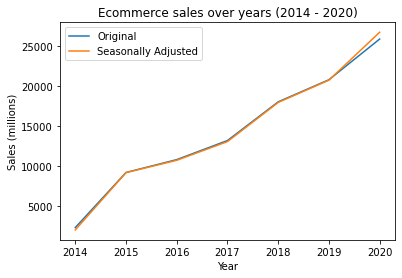

In [97]:
### Sales over years of ecommerce
plt.plot(sales_year['Year'], sales_year['Original ($m)'], label = "Original")
# plotting the line 2 points 
plt.plot(sales_year['Year'], sales_year['Seasonally Adjusted ($m)'], label = "Seasonally Adjusted")
plt.xlabel('Year')
# Set the y axis label of the current axis.
plt.ylabel('Sales (millions)')
# Set a title of the current axes.
plt.title('Ecommerce sales over years (2014 - 2020)')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

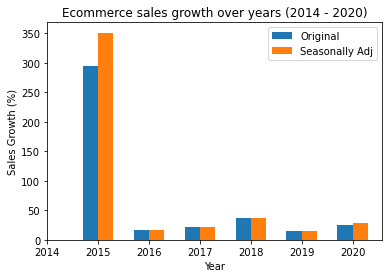

In [115]:
### Sales over years of ecommerce
width = 0.3
plt.bar(sale_growth_rate['Year'], sale_growth_rate['Original (%)'],width, label = "Original")
plt.bar(sale_growth_rate['Year'] + width, sale_growth_rate['Seasonally Adjusted (%)'], width, label = "Seasonally Adj")
# plotting the line 2 points 
plt.xlabel('Year')
# Set the y axis label of the current axis.
plt.ylabel('Sales Growth (%)')
# Set a title of the current axes.
plt.title('Ecommerce sales growth over years (2014 - 2020)')
# show a legend on the plot
plt.xticks(sale_growth_rate['Year'] + width / 2, ('2014','2015', '2016', '2017','2018','2019','2020'))
plt.legend()

# Display a figure.
plt.show()

In [131]:
plt.barh(state_vaccine_rate['State'],state_vaccine_rate['Vacination Rate'])
plt.ylabel('State')
# Set the y axis label of the current axis.
plt.xlabel('Vacination Rate (%)')
# Set a title of the current axes.
plt.title('Vacination Rate in Australia')


Text(0.5, 1.0, 'Vacination Rate in Australia')

#### Insights

In the last couple of years, the Ecommerce market have been growing consistently. There was a slowdown in **2019** (37.4% to 15.5%) but it started jumping back in **2020** (15.5% to 28.8%). Client can take advantage of this bounce-back. In terms of competitors, Australian market has already been dominated by some giants: Ebay, Gumtree, Amazon,... These company has covered a huge market segment and offer wide range of product categories. 

With the current COVID-19 vaccination status, some Australian territories are expected to be eased down from lockdown. **ACT, NSW** and **TAS** are likely to be ones to achieve this. However, this is still a conjecture and there is no official annoucements about lockdown easing.

In summary, here are some Threats and Opportunities for the client:
- Threats:
    - Market being captured by global ecomerce platforms.
    - Unpredictable lockdown easing time.
- Opportunities:
    - Ecommerce market is expected to grow and seem to have a post-COVID-19 surge.
    - Some territories have high potential to lauch early marketing campaigns.

### [3] Analysis of Internal Data - Strengths and/or Weaknesses
This section use the sale data in all product catgories to indentify the strengths and weaknesses of Prish. In details, the client needs to know about any crucial properties in terms products and orders will be identified and presented to the client. Questions to be andresses in this section:

- What are some of the key products that affects the growth of the business?

#### Data

In [4]:
# Data
type_data = pd.read_csv('./internal_data/business.retailsales.csv')

In [5]:
type_data

Product Type  Net Quantity  Gross Sales  Discounts  Returns  \
0     Art & Sculpture            34      14935.0    -594.00 -1609.00   
1              Basket            13       3744.0    -316.80     0.00   
2              Basket            12       3825.0    -201.60  -288.00   
3              Basket            17       3035.0     -63.25     0.00   
4     Art & Sculpture            47       2696.8     -44.16     0.00   
...               ...           ...          ...        ...      ...   
1770          Kitchen             0         28.0      -2.81   -25.19   
1771          Jewelry             0         28.0       0.00   -28.00   
1772           Basket             0        116.0     -23.20   -92.80   
1773          Kitchen             0         16.5       0.00   -16.50   
1774          Kitchen            -1          0.0       0.00  -106.25   

      Total Net Sales  
0            12732.00  
1             3427.20  
2             3335.40  
3             2971.75  
4             2652.64  
...               ...  
1770             0.00  
1771             0.00  
1772             0.00  
1773             0.00  
1774          -106.25  

[1775 rows x 6 columns]

We calculate the sums of sales in each product category to have a more concise data.

In [6]:
product_type_sum = type_data.groupby('Product Type', as_index=False).sum()
product_type_sum

Product Type  Net Quantity  Gross Sales  Discounts  Returns  \
0        Accessories            84      3892.40    -107.02     0.00   
1    Art & Sculpture          1427     90316.60   -2955.82 -2879.93   
2             Basket          1461    143815.50   -4584.42 -4439.69   
3          Christmas           575     15476.00    -345.19  -670.00   
4             Easter             1        38.00      -3.80     0.00   
5   Fair Trade Gifts           110      2258.00     -53.33     0.00   
6          Furniture            27      2034.00    -169.04     0.00   
7       Gift Baskets             1        19.50       0.00     0.00   
8         Home Decor           404     27114.55    -991.21  -423.35   
9            Jewelry           991     31048.00    -965.85  -509.20   
10              Kids           140      3838.00    -116.66     0.00   
11           Kitchen           809     16096.00    -431.11  -328.07   
12             Music            98      2643.50     -82.19  -142.41   
13     One-of-a-Kind            12      2180.00     -71.99     0.00   
14      Recycled Art            99      3792.80     -88.64     0.00   
15         Skin Care           101      2609.50     -37.70     0.00   
16         Soapstone           199      4795.50     -96.91   -69.50   
17          Textiles            43      1889.00    -112.90   -97.00   

    Total Net Sales  
0           3785.38  
1          84480.85  
2         134791.39  
3          14460.81  
4             34.20  
5           2204.67  
6           1864.96  
7             19.50  
8          25699.99  
9          29572.95  
10          3721.34  
11         15336.82  
12          2418.90  
13          2108.01  
14          3704.16  
15          2571.80  
16          4629.09  
17          1679.10

#### Analysis
We look at the total net sales of each product category to identify which one accounted for the majority of sales.

In [8]:
top_net_sales = product_type_sum.sort_values(by=['Total Net Sales'], ascending=False)
top_net_sales

Product Type  Net Quantity  Gross Sales  Discounts  Returns  \
2             Basket          1461    143815.50   -4584.42 -4439.69   
1    Art & Sculpture          1427     90316.60   -2955.82 -2879.93   
9            Jewelry           991     31048.00    -965.85  -509.20   
8         Home Decor           404     27114.55    -991.21  -423.35   
11           Kitchen           809     16096.00    -431.11  -328.07   
3          Christmas           575     15476.00    -345.19  -670.00   
16         Soapstone           199      4795.50     -96.91   -69.50   
0        Accessories            84      3892.40    -107.02     0.00   
10              Kids           140      3838.00    -116.66     0.00   
14      Recycled Art            99      3792.80     -88.64     0.00   
15         Skin Care           101      2609.50     -37.70     0.00   
12             Music            98      2643.50     -82.19  -142.41   
5   Fair Trade Gifts           110      2258.00     -53.33     0.00   
13     One-of-a-Kind            12      2180.00     -71.99     0.00   
6          Furniture            27      2034.00    -169.04     0.00   
17          Textiles            43      1889.00    -112.90   -97.00   
4             Easter             1        38.00      -3.80     0.00   
7       Gift Baskets             1        19.50       0.00     0.00   

    Total Net Sales  
2         134791.39  
1          84480.85  
9          29572.95  
8          25699.99  
11         15336.82  
3          14460.81  
16          4629.09  
0           3785.38  
10          3721.34  
14          3704.16  
15          2571.80  
12          2418.90  
5           2204.67  
13          2108.01  
6           1864.96  
17          1679.10  
4             34.20  
7             19.50

The company has 17 categories of products but only some of them account for the majority of sales.

In [9]:
## Sales Proportion
sum_net_sales = top_net_sales['Total Net Sales'].sum()

top_net_sales['Sales Proportion'] = top_net_sales['Total Net Sales']/ sum_net_sales
top_net_sales

Product Type  Net Quantity  Gross Sales  Discounts  Returns  \
2             Basket          1461    143815.50   -4584.42 -4439.69   
1    Art & Sculpture          1427     90316.60   -2955.82 -2879.93   
9            Jewelry           991     31048.00    -965.85  -509.20   
8         Home Decor           404     27114.55    -991.21  -423.35   
11           Kitchen           809     16096.00    -431.11  -328.07   
3          Christmas           575     15476.00    -345.19  -670.00   
16         Soapstone           199      4795.50     -96.91   -69.50   
0        Accessories            84      3892.40    -107.02     0.00   
10              Kids           140      3838.00    -116.66     0.00   
14      Recycled Art            99      3792.80     -88.64     0.00   
15         Skin Care           101      2609.50     -37.70     0.00   
12             Music            98      2643.50     -82.19  -142.41   
5   Fair Trade Gifts           110      2258.00     -53.33     0.00   
13     One-of-a-Kind            12      2180.00     -71.99     0.00   
6          Furniture            27      2034.00    -169.04     0.00   
17          Textiles            43      1889.00    -112.90   -97.00   
4             Easter             1        38.00      -3.80     0.00   
7       Gift Baskets             1        19.50       0.00     0.00   

    Total Net Sales  Sales Proportion  
2         134791.39          0.404677  
1          84480.85          0.253632  
9          29572.95          0.088785  
8          25699.99          0.077158  
11         15336.82          0.046045  
3          14460.81          0.043415  
16          4629.09          0.013898  
0           3785.38          0.011365  
10          3721.34          0.011172  
14          3704.16          0.011121  
15          2571.80          0.007721  
12          2418.90          0.007262  
5           2204.67          0.006619  
13          2108.01          0.006329  
6           1864.96          0.005599  
17          1679.10          0.005041  
4             34.20          0.000103  
7             19.50          0.000059

**Basket, Art & Scuplpture,Jewelry and Home Decor** had already account for over 80% of net sales.

In [10]:
## (Discount + Returns) / Gross sales ratio
top_net_sales['DRG Ratio'] = abs((top_net_sales['Discounts'] + top_net_sales['Returns'])/top_net_sales['Gross Sales'])
top_net_sales

Product Type  Net Quantity  Gross Sales  Discounts  Returns  \
2             Basket          1461    143815.50   -4584.42 -4439.69   
1    Art & Sculpture          1427     90316.60   -2955.82 -2879.93   
9            Jewelry           991     31048.00    -965.85  -509.20   
8         Home Decor           404     27114.55    -991.21  -423.35   
11           Kitchen           809     16096.00    -431.11  -328.07   
3          Christmas           575     15476.00    -345.19  -670.00   
16         Soapstone           199      4795.50     -96.91   -69.50   
0        Accessories            84      3892.40    -107.02     0.00   
10              Kids           140      3838.00    -116.66     0.00   
14      Recycled Art            99      3792.80     -88.64     0.00   
15         Skin Care           101      2609.50     -37.70     0.00   
12             Music            98      2643.50     -82.19  -142.41   
5   Fair Trade Gifts           110      2258.00     -53.33     0.00   
13     One-of-a-Kind            12      2180.00     -71.99     0.00   
6          Furniture            27      2034.00    -169.04     0.00   
17          Textiles            43      1889.00    -112.90   -97.00   
4             Easter             1        38.00      -3.80     0.00   
7       Gift Baskets             1        19.50       0.00     0.00   

    Total Net Sales  Sales Proportion  DRG Ratio  
2         134791.39          0.404677   0.062748  
1          84480.85          0.253632   0.064614  
9          29572.95          0.088785   0.047509  
8          25699.99          0.077158   0.052170  
11         15336.82          0.046045   0.047166  
3          14460.81          0.043415   0.065598  
16          4629.09          0.013898   0.034701  
0           3785.38          0.011365   0.027495  
10          3721.34          0.011172   0.030396  
14          3704.16          0.011121   0.023371  
15          2571.80          0.007721   0.014447  
12          2418.90          0.007262   0.084963  
5           2204.67          0.006619   0.023618  
13          2108.01          0.006329   0.033023  
6           1864.96          0.005599   0.083107  
17          1679.10          0.005041   0.111117  
4             34.20          0.000103   0.100000  
7             19.50          0.000059   0.000000

Exploring the **(Discount + Return) / Gross Sales** can help evaluate the performance of the product.

#### Visualizations

<AxesSubplot:title={'center':'Sales proportion by product categories'}>

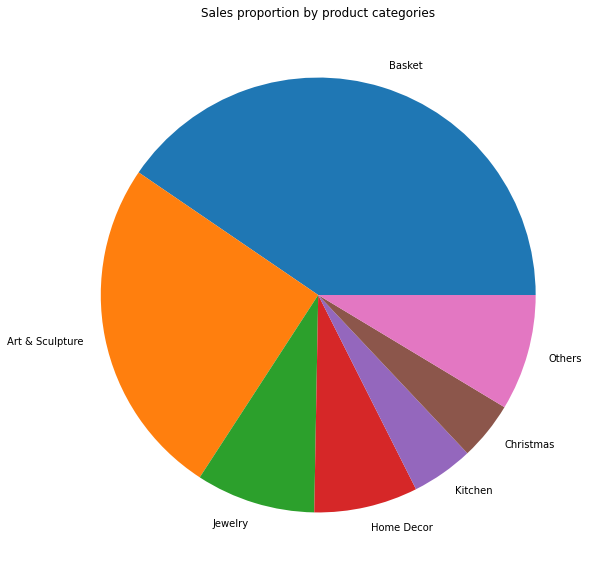

In [11]:
threshold = 0.03
small_net_sales = top_net_sales[top_net_sales['Sales Proportion'] < threshold][['Product Type', 'Sales Proportion']]
big_net_sales = top_net_sales[top_net_sales['Sales Proportion'] >= threshold][['Product Type', 'Sales Proportion']]

small_net_sales.set_index('Product Type', inplace=True)
big_net_sales.set_index('Product Type', inplace=True)

small_sums = pd.DataFrame([['Others', small_net_sales['Sales Proportion'].sum()]], columns=['Product Type', 'Sales Proportion'])
small_sums.set_index('Product Type', inplace=True)
big_net_sales = big_net_sales.append(small_sums)
big_net_sales.plot(kind='pie', 
                   y='Sales Proportion',
                   figsize=(10,10), 
                   label='', 
                   title ='Sales proportion by product categories', 
                   legend=None)


<AxesSubplot:title={'center':'Discount Return/Gross Sales Ratio'}, xlabel='Product Type', ylabel='(Discount + Return) / Gross Sales'>

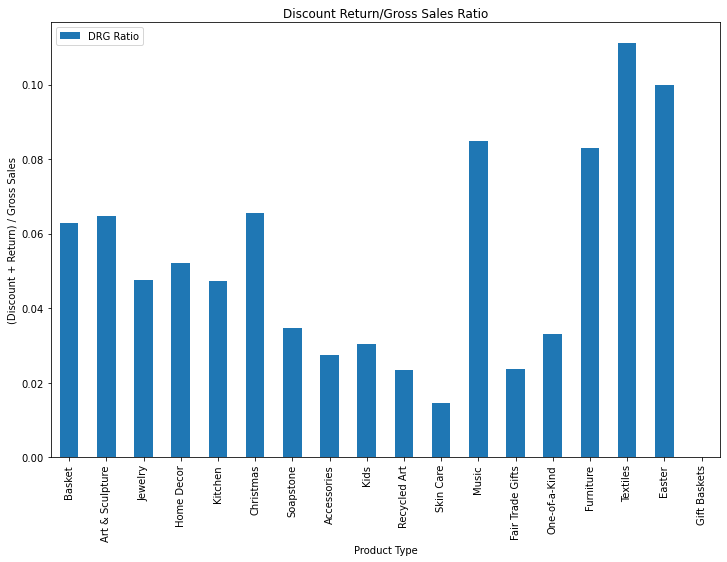

In [125]:
## Discount ratio of top 6 products
top_net_sales.plot(kind='bar', x='Product Type', y='DRG Ratio', figsize=(12,8), 
                   title='Discount + Return/Gross Sales Ratio', 
                   ylabel='(Discount + Return) / Gross Sales')

#### Insights

From the analysis and visualizations above, even though the company had covered a wide range of product types, only a few categories showed high potential. There are 6 categories that covered over 3% of sales each: **Basket, Art & Sculpture, Jewelry, Home Decor, Kitchen** and **Christmas**. These categories also have fairly low DRG ratio, espicially **Jewlry** (8% of sales and 0.04 DRG ratio). Some product have really minimal sales and high DRG ratio such as: **Music, Furniture, Textiles,** and **Easter**.

Overall, Prish has following strengths and weaknesses:
- Strengths:
    - Have really high sales in some product categories such as **Basket, Art & Sculpture** and **Jewelry**. 
    - Low DRG ratio for these types.
- Weaknesses:
    - Cover too many product categories across multiple market sections.
    - Many low-performance product categories.
    

### [4] TOWS analysis - actionable recommendations

With the analysis above, we developed a set of strategies for the client to match his business strengths and weaknesses with external factors:
- Maxi-Maxi (Strengths - Opportunities): Plan early marking campaigns in territories such as NSW or ACT and leverage the post-COVID market surge to focus strongly on high performance categories. Acquiring high sales early is crucial as it creates a premise to develop further.

- Maxi-Mini (Strengths - Threats): Avoid competing with gigantic ecommerce platform in multiple fronts by remove some weak categories. Anything covered covered less than 3% of sales should be considered to be removed. Increase discounts for high-performance product types to capture great market segments.

- Mini-Maxi (Weaknesses - Opportunities): With the opportunities facilitating the early growth, the business should have a steady growth at the beginning. We can start slowly reducing the focus on weak product types.

- Mini-Mini (Weaknesses - Threats): Withdraw from low-sales products. Consider moving up the timeline ro lauch the business earlier as COVID lockdown seems unpredictable.


---

### [5] Peer review

You should have a minimum of 2 reviewers and you should review a minimum of 2 other students work.

#### Feedback received - reviewer 1: Jonathan Daniel (N11137452)
A. External Data

Questions: 
-	Is the concerned market growing recently? What is the potential market size?
-	What is the competitiveness of the market?
-	What some COVID-related factors that could affect the business lauching timeline?

Feedback:
- How does vaccination rate translate to business metrics such as sales? What is the correlation of vaccination and engagement with e-commerce? Does decreasing or increasing vaccine rates accurately predict pandemic outlook as it relates to the business?
- Monthly data along with year is not analysed for external analysis, what about the difference between February 2018 to February 2019 for example?
- “Australia is aimed to get 80% before fully open the lockdown. ACT, NSW and TAS seem to be the first three hitting the target.” There seems to me to be a fair bit of extrapolation on what lifting the lockdown would mean and which states would achieve it first, if the lockdown caused a soar of sales does that mean that the opening lockdown would cause a decrease in sales?
- E-commerce sales growth percentage for the year 2015 is weighed against the last quarter (3 months) of the year 2014. Making it 300-350%, this is quite strange and can be misleading. Especially as the table displays the X value as 2014 rather than only the last quarter.

B. Internal Data

Questions:
-	What are some of the key products that affects the growth of the business?

Feedback:
- The question was answered alongside correct visualization


#### Feedback received - reviewer 2: Dylan Robertson (N10487310)
- Good detail on Business concern and business’s background & situation
- Good use of clearly presented tables.
- Some tables have no mark down explanation, a brief sentence or well worded Title for the table could help with comprehension.
- Decent use of visualization, a few lines of mark down explaining key values in the data could add to comprehension.
- Very good understanding of global environment the business finds itself in.
- Pie chart could contain percentage values and a key for better accuracy.
- Good tows analysis, could separate strengths and weaknesses into external and internal categories. 


#### [optional] Feedback received - reviewer 3: Firstname Lastname (Student number)

*## Write comments here ##*

#### Response to feedback received:

*## Write response here ##*

Vaccination rate engagement with the business is elaborated. The data record mistake for the ecommerce market growth data is mentioned and justified. Reviewer 1 mentions about the negative correlation between lockdown ease and business sales growth. But as required in the business concern, the client wants to launch the business as soon as the states are open. This could be due financial or operational reasons. Also, lockdown ease might achieve the market excitement that facilitate the buying decision and allow sales to grow even stronger.

#### Feedback given to reviewer 1:
-	Should have more details on business background, goal, and current state.
-	Can expand the TO analysis further by analyze business competition. The current report shows the trends in various product types but did not link them to the business current situation.
-	Should have examined the month data separately with the year. The report has assumed different Year does not have impact in the business performance each month.

#### Feedback given to reviewer 2:
-	Good background context of the business.
-	Should improve the skeleton of the report. Different steps of the QDAVI should be clearly indicated and explained.
-	Comprehensive TOWS analysis. The report has analyzed the ecommerce market as well as competitors in regard with the business main market sector. Performance of the business over each year and product type is clearly indicated. 

#### [optional] Feedback given to reviewer 3:

*## Write comments here ##*